In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as colors
import numpy as np
import os
import csv
from matplotlib.gridspec import GridSpec
import re
import pickle
import scipy
from numpy import polynomial as poly

In [2]:
def kernel(x, loc):
    out = 0
    for i in [-1,0,1]:
        out += 0.5*np.exp(-(25.0*((x+(i)) - loc))**(2));
    return out

In [3]:
def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    current_path = os.getcwd()
    rust_path = f"{current_path}/ripleys_k/target/release/ripleys_k"
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

def expectation_diff(vs, res=50):
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs), ts, ks

def red(vs, h_width, res=50):
    vs = np.array(vs) / (h_width)
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs)


In [4]:
def get_final(dir_to_get, ic_file = False):
    out = []
    run_len = len(os.listdir(dir_to_get)) if not ic_file else len(os.listdir(dir_to_get))-1

    with open(dir_to_get+f"{run_len-1}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_ics(dir_to_get, ic_file=False):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{0}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out


def get_all(dir_to_get):
    out = []
    temp_dir_list = os.listdir(dir_to_get); dir_list = []
    for fi in temp_dir_list:
        if fi != "ic.csv": dir_list.append(fi)
    runs = np.sort([int(a[0:-4]) for a in dir_list])
    for run in runs:
        run_out = []
        with open(dir_to_get+f"{run}.csv") as f:
            reader = csv.reader(f)

            for v in reader:
                run_out.append([float(a) for a in v])
        out.append(run_out)
    return out

def get_file(f_to_get):
    out = []
    with open(f_to_get) as f:
        reader = csv.reader(f)
        for v in reader:
            out.append([float(a) for a in v])
    return out
    

Average Taxis/Diffusion Sensitivity of 5 different initial conditions.

In [6]:
# t_sens_dir = "/media/jonatank/PG/HML/t_test_finals"
# fs = os.listdir(t_sens_dir)

# ics, ts, ds = [],[],[]
# for f in fs:
#     ic = re.search("ic_([\w.]*).t_", f).group(1)
#     t = re.search("t_([\w.]*).d_", f).group(1)
#     d = re.search("d_([\w.]*).csv", f).group(1)

#     ics.append(ic)
#     ts.append(t)
#     ds.append(d)

# ics = np.sort([float(i) for i in list(set(ics))])
# ts = np.sort([float(i) for i in list(set(ts))])
# ds = np.sort([float(i) for i in list(set(ds))])

ics = np.linspace(0,4,5)
ts = np.linspace(0,0.5,30)
ds = np.linspace(0,0.3,30)

with open("/media/jonatank/PG/HML/main_t_sens_itd.pkl", "rb") as f:
    rips_dict = pickle.load(f)

data = []
for ic in ics:
    t1 = []
    for t in ts:
        t0=[]
        for d in ds:
            t0.append(rips_dict[(ic,t,d)])
        t1.append(t0)
    data.append(t1)
data = np.mean(data,axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/main_t_sens_itd.pkl'

NameError: name 'data' is not defined

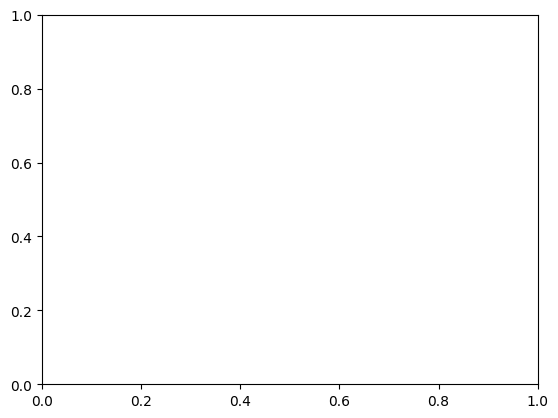

In [6]:
fig, ax = plt.subplots()
# pos = ax.imshow(taxis_data_avg, origin="lower", cmap="inferno", vmin=0.0, vmax=0.5)
pos = ax.imshow(data, origin="lower", cmap="inferno", vmin=0.0)

fig.colorbar(pos)
# ax.set_title(r"$D$ vs $u$ vs $\widehat{K}_\circ$")
ax.set_xlabel("$D$")
ax.set_ylabel("$u$")
ax.set_xticks([0,29], [ds[0],ds[-1]])
ax.set_yticks([0,29], [ts[0], ts[-1]])

D = np.linspace(0,29,200)
ax.plot(D, (3/5)*D,color="w")
ax.text(24,13,"$D=u$",color="w",fontsize=15)

plt.show()

Average Memory/Diffusion Sensitivity of 5 different initial conditions.

In [7]:
eks_mean = np.transpose(np.load("/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy"))
mem_list = np.load("/media/jonatank/PG/HML/mem_sens_mlist.npy")
diff_list = np.load("/media/jonatank/PG/HML/mem_sens_dlist.npy")
fig, ax = plt.subplots()
# im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0,vmax=0.5)
im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0)
fig.colorbar(im)
# ax.set_title(r"$D$ vs $v$ vs $\widehat{K}_\circ$")
ax.set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
ax.set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
ax.set_ylabel("$v$")
ax.set_xlabel("$D$")
D=np.linspace(0,29,100)
ax.plot(D,(3/5)*D, color="w")
ax.text(24,13,"$D=v$",color="w",fontsize=15)


FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy'

Initial Condition Variance

In [8]:
def is_not_mixed(arr, thresh):
    p0 = np.all([i<thresh for i in arr])
    p1 = np.all([i>=thresh for i in arr])
    return p0 or p1

eks = np.transpose(np.load("/media/jonatank/PG/HML/mem_sens_final_ks.npy"))
vars = []
for i in range(30):
    temp_vars = []
    for j in range(30):
        temp_vars.append(is_not_mixed(eks[i,j], 0.02))
    vars.append(temp_vars)
ax.set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
ax.set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
ax.set_ylabel("$v$")
ax.set_xlabel("$D$")

fig, ax =plt.subplots()    
im = ax.imshow(vars, origin="lower",cmap="grey")
cbar = fig.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(["Mixed", "Unmixed"])

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/mem_sens_final_ks.npy'

Taxis Speed Sensitivity

In [9]:
# slice_index = 8
pop_out_indexes = [0,14,20]
# pop_out_indexes = [19,20,25]
# eks_mean = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks_avg.npy")
# eks = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks.npy")
# taxis_list = np.load("/media/jonatank/PG/HML/taxis_sens_tlist.npy")
# diff_list = np.load("/media/jonatank/PG/HML/taxis_sens_dlist.npy")
# slice_mean = eks_mean[:,slice_index]
# slice_list = [eks[i][:,slice_index] for i in range(5)]
# slice_var = np.var(slice_list, axis=0)

diff = 0.083
t_dir = "taxis_quick_long"
# t_dir = "taxis_quick"
# ics_dirs = np.sort(os.listdir("taxis_quick"))
# taxis_dirs = np.sort(os.listdir(f"taxis_quick/{ics_dirs[4]}/"))
ics_dirs = np.sort(os.listdir(t_dir))
taxis_dirs = np.sort(os.listdir(f"{t_dir}/{ics_dirs[4]}/"))
taxis_list = np.array([float(i[6:]) for i in taxis_dirs])
slice_list= []
for ic_dir in ics_dirs:
    t_ks = []
    for taxis_dir in taxis_dirs:
        s,f = get_final(f"{t_dir}/{ic_dir}/{taxis_dir}/")
        # s,f = get_final(f"taxis_quick/{ic_dir}/{taxis_dir}/")
        k = expectation_diff(s)[0]
        t_ks.append(k)
    slice_list.append(t_ks)

slice_mean = np.array([np.mean(a) for a in np.transpose(slice_list)])
slice_var = np.array([np.var(a) for a in np.transpose(slice_list)])
slice_max = np.array([np.max(a) for a in np.transpose(slice_list)])
slice_min = np.array([np.min(a) for a in np.transpose(slice_list)])



fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
axtop.plot(taxis_list, slice_mean, label="Mean")
axtop.fill_between(taxis_list, slice_min, slice_max - slice_var, alpha=0.5, color='#089fff', label="Variance")
# axtop.fill_between(taxis_list, slice_mean+slice_var, slice_mean - slice_var, alpha=0.5, color='#089fff', label="Variance")
axtop.scatter([taxis_list[i] for i in pop_out_indexes], [slice_mean[i] for i in pop_out_indexes], color="r")
# offsets = [[0.01,0],[0.01,-0.02],[0, 0.01]]
offsets = [[0,0] for i in range(3)]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(taxis_list[p]+offsets[letter][0], slice_mean[p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    # a = get_all(f"/media/jonatank/PG/HML/taxis_sens_0/taxis_{taxis_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    a = get_all(f"{t_dir}/{ics_dirs[4]}/{taxis_dirs[pop_out_indexes[i]]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=len(a)-1
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axtop.set_xlabel("Taxis Range")
    axtop.set_ylabel("Ripley's K")

axmid[0].set_ylabel("Timestep")
# fig.suptitle(f"Taxis Speed Sensitivity ($\kappa =$ {round(diff_list[slice_index],3)})")
fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

<>:85: SyntaxWarning: invalid escape sequence '\k'
<>:85: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_21503/686305594.py:85: SyntaxWarning: invalid escape sequence '\k'
  fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")
/tmp/ipykernel_21503/686305594.py:85: SyntaxWarning: invalid escape sequence '\k'
  fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")


FileNotFoundError: [Errno 2] No such file or directory: 'taxis_quick_long'

Memory Speed Sensitivity

In [11]:
# slice_index = 8
slice_index = 11
pop_out_indexes = [0,8,20]
pop_out_runs = [3,3,3]
main_mem_dir = f"/media/jonatank/PG/HML/main_mem_sens/"

mem_flist = np.sort(os.listdir(f"{main_mem_dir}/run_0/"))
diff_flist = np.sort(os.listdir(f"{main_mem_dir}/run_0/{mem_flist[0]}"))
mem_list = [float(s[4:]) for s in mem_flist]
diff_list = [float(s[5:]) for s in diff_flist]

slice_list = []
for r in range(5):
    mem_ed = []
    for mf in mem_flist:
        distro = get_final(f"{main_mem_dir}run_{r}/{mf}/{diff_flist[slice_index]}/")[0]
        mem_ed.append(expectation_diff(distro)[0])
    slice_list.append(mem_ed) 
slice_mean = np.mean(slice_list,axis=0)
slice_var = np.var(slice_list, axis=0)
slice_max = np.max(slice_list, axis=0)
slice_min = np.min(slice_list, axis=0)

fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
axtop.plot(mem_list, slice_mean, label="Mean")
for i in range(5):
    if i ==0:
        axtop.plot(mem_list, slice_list[i], label=f"IC", color="grey", alpha=0.4)
    else:
        axtop.plot(mem_list, slice_list[i], color="grey", alpha=0.4)
axtop.fill_between(mem_list, slice_max, slice_min - slice_var, alpha=0.5, color='#089fff', label="Range")
axtop.scatter([mem_list[i] for i in pop_out_indexes], [slice_list[r][i] for r,i in zip(pop_out_runs, pop_out_indexes)], color="r")
offsets = [[0,0.01],[0,-0.03],[0, 0.01]]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(mem_list[p]+offsets[letter][0], slice_list[pop_out_runs[letter]][p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    a = get_all(f"/media/jonatank/PG/HML/main_mem_sens/run_{pop_out_runs[i]}/mem_{mem_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=450
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axtop.set_xlabel("Memory Speed")
    axtop.set_ylabel("RED Value")

axmid[0].set_ylabel("Timestep")
fig.suptitle(f"$D =$ {round(diff_list[slice_index],3)}")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/main_mem_sens//run_0/'

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/fish.png'

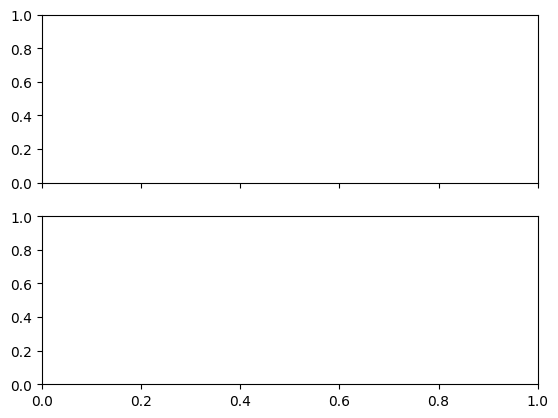

In [12]:
def mem_func(x):
    return 0.75-0.1*x
np.random.seed(1)
stations = [0.035,0.26,0.32,0.337,0.5,0.7]
x = np.linspace(0,1,300)
ind_kernals = [[kernel(x_v,s) for x_v in x] for s in stations]
K = np.sum(ind_kernals, axis=0) 
f_loc = 0.55
k_f_loc = K[np.argmin(np.absolute(x-f_loc))]
grad_offset = 0.03
grad = (K[np.argmin(np.absolute(x-f_loc))]-K[np.argmin(np.absolute(x-f_loc))+1])/((x[0]-x[1]))
taxis_x = 150
c=0.2
mem_dest = 0.69
mem = [f_loc, 0.31,mem_dest]
mem_rate=0.15
lab = True
fig, ax = plt.subplots(2,1,sharex=True)


for plot_num in [0,1]:
    image = plt.imread("/media/jonatank/PG/HML/fish.png")
    im = OffsetImage(image,zoom=0.030)
    ab = AnnotationBbox(im,(f_loc+0.028,1.05), xycoords='data', frameon=False)
    ax[plot_num].add_artist(ab)
    for k in ind_kernals:
        stren= 0.85
        if lab: 
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,label="$k_s(x)$", linestyle="--")
            lab=False
        else:
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,linestyle="--")
    ax[plot_num].plot(x,K, label="$K(x)$")
    ax[plot_num].scatter(stations, np.zeros_like(stations),zorder=10, label="Cleaning Station")
    ax[plot_num].scatter([f_loc],[1.05], label="Fish",color="orange",zorder=50)
    ax[plot_num].plot([f_loc,f_loc],[1.05,k_f_loc],alpha = 0.4,color="orange")
ax[0].plot([f_loc+grad_offset,f_loc-grad_offset],[k_f_loc+grad_offset*grad,k_f_loc-grad_offset*grad],color="r", linewidth=2)
ax[0].arrow(f_loc,1.05,-c,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[0].plot([x[taxis_x],x[taxis_x]],[1.05,K[taxis_x]],alpha = 1,color="r",linestyle="--")
ax[0].arrow(f_loc,1.05,x[taxis_x]-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="r",facecolor='r', alpha=1)
ax[0].scatter([f_loc],[k_f_loc],color="r",s=20)
text_y_offsets=[-0,-0.1,-0.1]
for i,m in enumerate(mem):
    y = K[np.argmin(np.absolute(x-m))]
    ax[1].plot([m,m],[y*mem_func(i),y],color="purple", linewidth=1, alpha=0.8)
    ax[1].plot([m,m],[0,y*mem_func(i)],color="purple",linewidth = 2)
    ax[1].annotate(r"$\mathbf{m_"+str(i)+"}$",[m+0.008,y*mem_func(i)+text_y_offsets[i]],color="purple")
    ax[1].scatter([m],[y*mem_func(i)],marker="x",color="purple")
ax[1].arrow(f_loc,1.05,-mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_dest-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="purple",facecolor='purple', alpha=1)
ax[1].plot([mem_dest,mem_dest],[1.05,K[np.argmin(np.absolute(x-mem_dest))]],linestyle="--",color="purple")
ax[0].annotate(f"u",[f_loc-c/2,1.08],color="black",alpha=0.8)
ax[1].annotate(f"v",[f_loc+0.08,1.08],color="black",alpha=0.8)
ax[1].annotate(f"v",[f_loc-0.08,1.08],color="black",alpha=0.8)
plt.xlim(0,1)
for plot_num in [0,1]:
    ax[plot_num].set_ylim(-0.1,1.2)
plt.xlabel("Location")
plt.xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_ylabel("Kernel Height")
ax[1].set_ylabel("Kernel Height")
ax[0].set_title("Taxis based Movement")
ax[1].set_title("Memory based Movement")
# plt.legend()

In [29]:
base_dir0 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const/'
base_dir1 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const_clump/'
base_dir2 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const_wide/'
bdirs = [base_dir0,base_dir2,base_dir1]
data = []
for bdir in bdirs:
    data0 = []
    for r in range(5):
        r_dir = bdir + f"ics_{r}/"
        r_list = []
        for i in range(100):
            s, f = get_final(f"{r_dir}{i}/")
            red = expectation_diff(s)[0]
            r_list.append(red)
        data0.append(r_list)
    data.append(data0)

In [30]:
ics = []
for r in range(5):
    ics.append(get_ics(base_dir0 + f"ics_{r}/0/"))

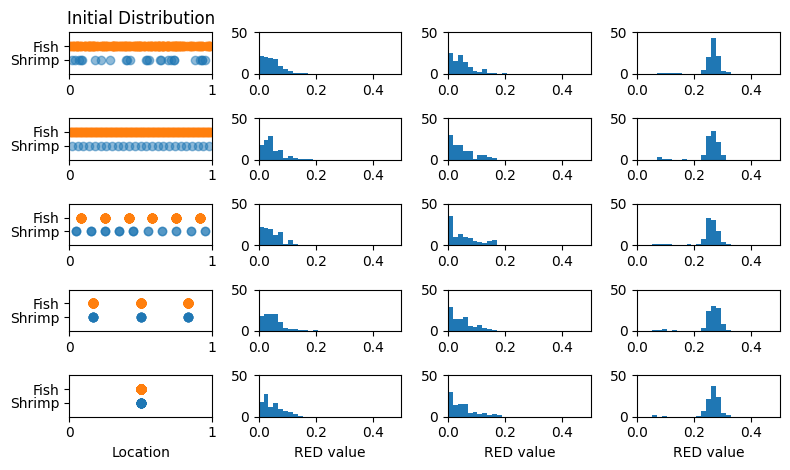

In [32]:
fig, ax = plt.subplots(5,4)
ax[0][0].set_title("Initial Distribution")
for j in [1,2,3]:
    ax[4][j].set_xlabel("RED value")
ax[4][0].set_xlabel("Location")
for i in range(5):
    for a in range(3):
        ax[i][a+1].hist(data[a][i],np.linspace(0,0.5,30))
        ax[i][a+1].set_xlim(0,0.5)
        ax[i][a+1].set_ylim(0,50)
    ax[i][0].set_ylim(0,1)
    ax[i][0].set_xlim(0,1)
    ax[i][0].set_xticks([0,1])
    ax[i][0].set_yticks([1/3,2/3])
    ax[i][0].set_yticklabels(["Shrimp", "Fish"])
    ax[i][0].scatter(ics[i][0], np.zeros_like(ics[i][0])+(1/3),alpha=0.5)
    ax[i][0].scatter(ics[i][1], np.zeros_like(ics[i][1])+(2/3),alpha=0.5)
fig.set_figwidth(8)
fig.tight_layout()

Ratio Sensitivity

In [7]:
base_dir = "/home/jonatank/Documents/HML/hml_fp/trial_runs/ratio_test_1/"
ratios_dirs = np.sort(os.listdir(base_dir))
ratios = [float(i[2:]) for i in ratios_dirs]
d = []
for i, ratio in enumerate(ratios):
    ratio_reds = []
    for run in range(10):
        s, f = get_final(f"{base_dir}/{ratios_dirs[i]}/{run}/", True)
        red = expectation_diff(s)[0]
        ratio_reds.append(red)
    d.append(ratio_reds)

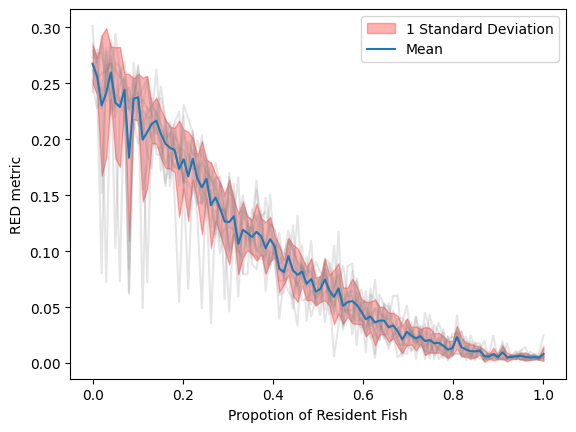

In [8]:
d_bar = np.mean(d, axis=1)
d_std = np.std(d, axis=1)
for d_samp in np.transpose(d):
    plt.plot(ratios, d_samp,alpha=0.2,color="grey")
plt.fill_between(ratios, d_bar+d_std, d_bar-d_std, label="1 Standard Deviation",color = "red", alpha=0.3)
plt.plot(ratios, d_bar,label="Mean")
plt.legend()
plt.xlabel("Propotion of Resident Fish")
plt.ylabel("RED metric")
# c=np.polyfit(ratios, d_bar,2)
# plt.plot(ratios, np.polynomial.polynomial.polyval(ratios,np.flip(c)))
plt.show()

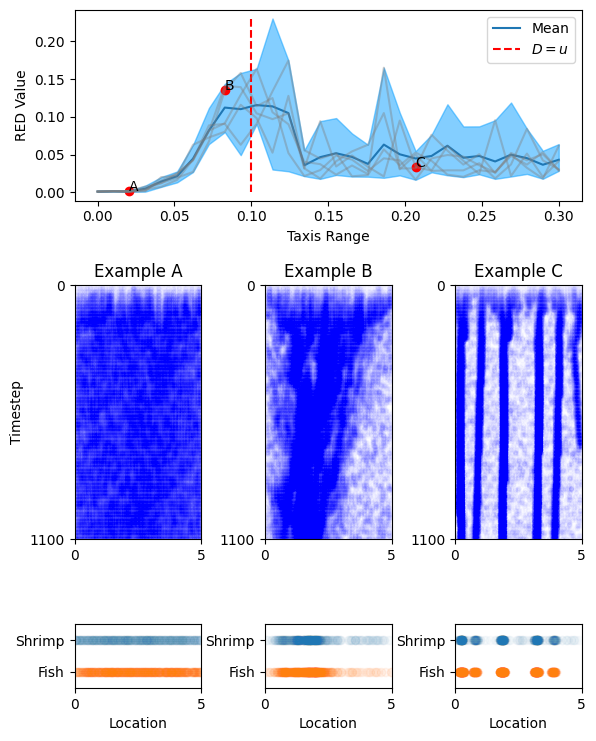

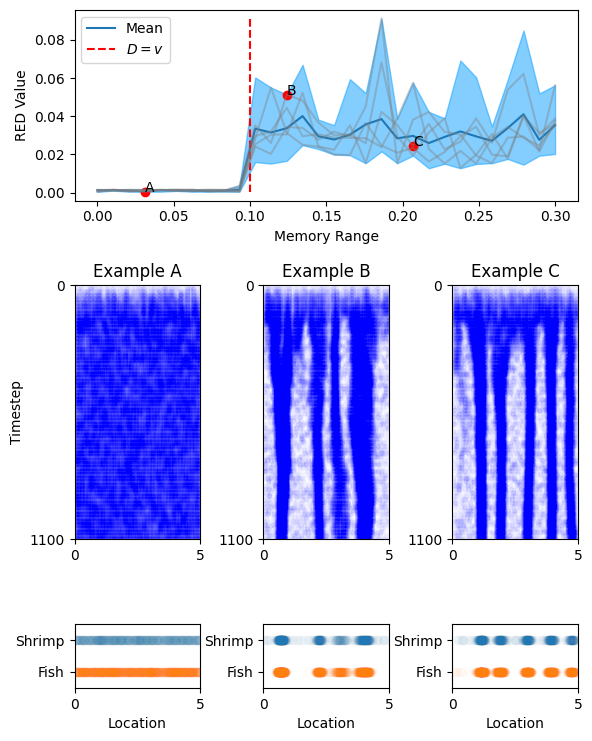

In [26]:
for taxis in [True,False]:
    data = []
    for run in range(10):
        if taxis:
            base_dir = f"./rsync/1dtaxis/1dtaxis_{run}/"
        else :
            base_dir = f"./rsync/1dmem/1dmem_{run}/"

        x_list = [float(i[8:]) for i in np.sort(os.listdir(base_dir))]
        dir_list = np.sort(os.listdir(base_dir))
        d = []
        for fil in dir_list:
            s,f = get_final(base_dir+fil+"/")
            d.append(red(s,5))
            # mem_list = np.linspace(0,1,30)
        data.append(d)

    if taxis:
        pop_out_indexes = [2,8,20]
        pop_out_runs = [3,3,2]
    else:
        pop_out_indexes = [3,12,20]
        pop_out_runs = [3,3,6]
    main_mem_dir = f"/media/jonatank/PG/HML/main_mem_sens/"


    slice_list = data
    slice_mean = np.mean(data,axis=0)
    slice_var = np.var(data, axis=0)
    slice_max = np.max(data, axis=0)
    slice_min = np.min(data, axis=0)

    fig = plt.figure()
    gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
    axtop = fig.add_subplot(gs[0,:])
    mean_line, = axtop.plot(x_list, slice_mean, label="Mean")
    d_line_label = "$D=u$" if taxis else "$D=v$"  
    d_line, = axtop.plot([0.1,0.1], [np.max(slice_max), np.min(slice_min)], label =d_line_label, color="red", linestyle="dashed")

    for i in range(5):
        if i ==0:
            axtop.plot(x_list, slice_list[i], label=f"IC", color="grey", alpha=0.4)
        else:
            axtop.plot(x_list, slice_list[i], color="grey", alpha=0.4)
    axtop.fill_between(x_list, slice_max, slice_min - slice_var, alpha=0.5, color='#089fff', label="Range")
    axtop.scatter([x_list[i] for i in pop_out_indexes], [slice_list[r][i] for r,i in zip(pop_out_runs, pop_out_indexes)], color="r")
    offsets = [[0,0],[0,0],[0, 0]]
    for letter, p in enumerate(pop_out_indexes):
        axtop.text(x_list[p]+offsets[letter][0], slice_list[pop_out_runs[letter]][p]+ offsets[letter][1], ["A","B","C"][letter])
    axtop.legend(handles=[mean_line,d_line])
    axmid = []
    for i in range(3):
        axmid.append(fig.add_subplot(gs[1,i]))
    axbot = []
    for i in range(3):
        axbot.append(fig.add_subplot(gs[2,i]))

    for i in range(3):
        if taxis:
            a = get_all(f"./rsync/1dtaxis/1dtaxis_{pop_out_runs[i]}/"+dir_list[pop_out_indexes[i]]+"/")
        else:
            a = get_all(f"./rsync/1dmem/1dmem_{pop_out_runs[i]}/"+dir_list[pop_out_indexes[i]]+"/")
        ss = [s[0] for s in a]
        fs = [f[1] for f in a]
        l=1100
        # l=len(ss)-1
        axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.02)
        axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.02)
        # ax[0][0].set_ylabel("Time")
        axbot[i].set_xlabel("Location")
        # axmid[i].set_xlabel("Location")
        for c in range(0,l,round(l/200)):
            axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.01, color="b",marker=".")
        axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
        axmid[i].set_ylim(0,l)
        axmid[i].invert_yaxis()
        axbot[i].set_ylim(0,1)
        axmid[i].set_yticks([0,l])
        axmid[i].set_xticks([0,5])
        axbot[i].set_xticks([0,5])
        axbot[i].set_yticks([1/4,3/4])
        axbot[i].set_yticklabels(["Fish", "Shrimp"])
        axmid[i].set_xlim([0,5])
        axbot[i].set_xlim([0,5])
        if taxis:
            axtop.set_xlabel("Taxis Range")
        else:
            axtop.set_xlabel("Memory Range")


        axtop.set_ylabel("RED Value")
    axmid[0].set_ylabel("Timestep")
    # fig.suptitle(f"$D =0.1$")
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.set_figheight(8)
    fig.set_figwidth(6)
    plt.show()

In [101]:
base_dir = "/home/jonatank/Documents/HML/hml_fp/trial_runs/ratio_high_width/"
ratios_dirs = np.sort(os.listdir(base_dir))
ratios = [float(i[2:]) for i in ratios_dirs]
d = []
for i, ratio in enumerate(ratios):
    ratio_reds = []
    for run in range(5):
        s,f = get_all(f"{base_dir}/{ratios_dirs[i]}/{run}/")[1]
        r = red(s,5)
        ratio_reds.append(r)
    d.append(ratio_reds)

In [102]:
loc_ratios = [0.37,0.32,0.01]
loc_names = [u"Curaçao", 'Honduras', 'USVI']
m = np.mean(d,axis=1)
s = np.std(d,axis=1)
loc_reds = []
for ra in loc_ratios:
    p = poly.Polynomial(poly.polynomial.polyfit(ratios,m,3))
    loc_reds.append(p(ra))

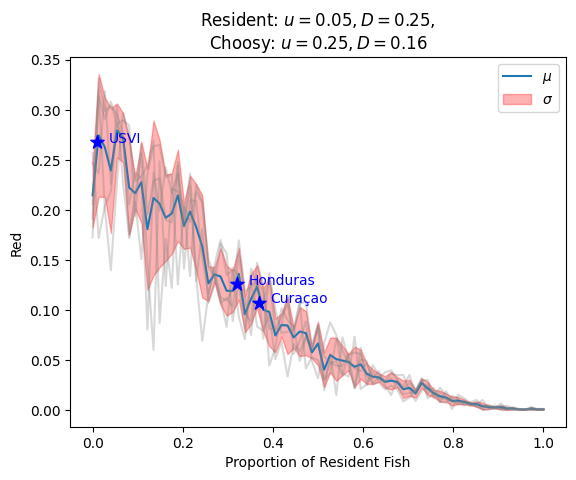

In [103]:
plt.plot(ratios,m,label=r"$\mu$")
plt.fill_between(ratios,m+s,m-s,alpha = 0.3,color="red",label=r"$\sigma$")
plt.plot(ratios,d,alpha=0.3, color="grey")
plt.xlabel("Proportion of Resident Fish")
plt.ylabel("Red")
plt.title(r"Resident: $u = 0.05, D = 0.25$," + "\n" + r"Choosy: $u = 0.25, D=0.16$")
plt.legend()
plt.scatter(loc_ratios,loc_reds, marker="*",color="blue",zorder=100,s=100)
for i, (x, y) in enumerate(zip(loc_ratios,loc_reds)):
    plt.text(x+0.025,y,loc_names[i],color="blue")

In [83]:
ic_dirs = np.sort(os.listdir("rsync/ic_hist"))
param_dirs = np.sort(os.listdir(f"rsync/ic_hist/{ic_dirs[0]}"))
run_dirs =  np.sort(os.listdir(f"rsync/ic_hist/{ic_dirs[0]}/{param_dirs[0]}"))
ics = {}
for ic_d in ic_dirs:
    ps={}
    for p_d in param_dirs:
        reds = []
        for r_d in run_dirs:
            s,f = get_all(f"rsync/ic_hist/{ic_d}/{p_d}/{r_d}/")[-1]
            reds.append(red(s,5)) 
        ps[p_d] = reds
    ics[ic_d] = ps

In [87]:
ic_states = []
p_d = param_dirs[0]
for ic_d in ic_dirs:
    ic_states.append(get_all(f"rsync/ic_hist/{ic_d}/{p_d}/{run_dirs[0]}/")[0])

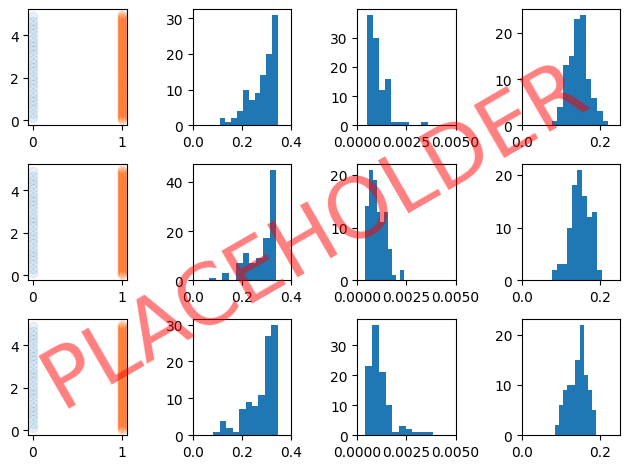

In [103]:
x_ranges = [(0,0.4),(0,0.005),(0,0.25)]
y_ranges = [(0,45),(0,40),(0,25)]
fig, ax = plt.subplots(3,4)
for ic_num, i_d in enumerate(ic_dirs):
    ax[ic_num,0].scatter(np.zeros_like(ic_states[ic_num][0]),ic_states[ic_num][0],alpha=0.1)
    ax[ic_num,0].scatter(np.zeros_like(ic_states[ic_num][1])+1,ic_states[ic_num][1],alpha=0.01)
    for p_num, p_d in enumerate(param_dirs):
        ax[ic_num,p_num+1].hist(ics[i_d][p_d])
        ax[ic_num,p_num+1].set_xlim(x_ranges[p_num])
fig.text(0.5, 0.5, 'PLACEHOLDER', fontsize=60, color='red', alpha=0.5,ha='center', va='center', rotation=30)
fig.tight_layout()



In [ ]:
ic_dirs = np.sort(os.listdir("rsync/taxis2d_full"))
d_dirs = np.sort(os.listdir(f"rsync/taxis2d_full/{ic_dirs[0]}"))
t_dirs = np.sort(os.listdir(f"rsync/taxis2d_full/{ic_dirs[0]}/{d_dirs[0]}"))
t_list = [float(t[2:]) for t in t_dirs]
d_list = [float(d[2:]) for d in d_dirs]

In [110]:
# d0 = []
# for ic_dir in ic_dirs:
#     d1=[]
#     for d_dir in d_dirs:
#         d2=[]
#         for t_dir in t_dirs:
#             s,f = get_all(f"rsync/taxis2d_full/{ic_dir}/{d_dir}/{t_dir}/")[-1]
#             d2.append(red(s,5)) 
#         d1.append(d2)
#     d0.append(d1)
# d0 = np.array([np.transpose(c) for c in d0])
d0 = np.load("rsync/2dtaxis_full.npy")

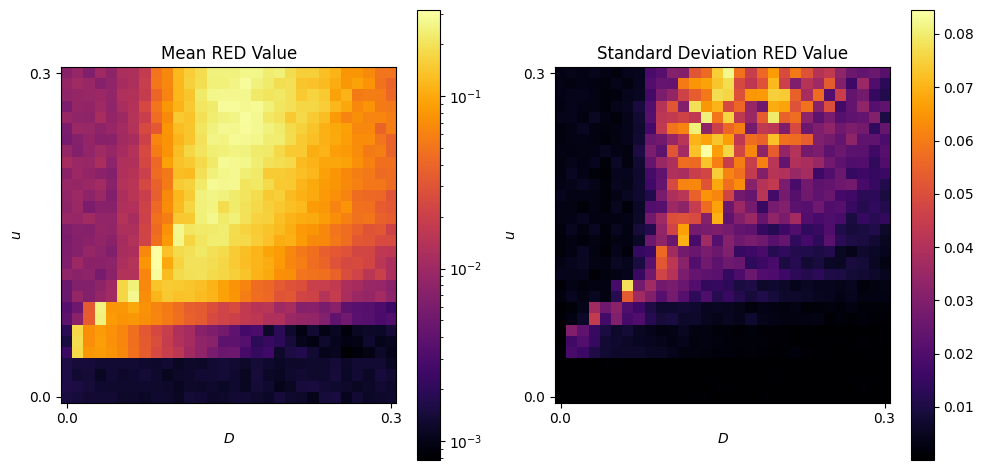

In [118]:
mu_arr = np.mean(d0,axis=0)
sigma_arr = np.std(d0,axis=0)
fig,ax = plt.subplots(1,2)
im0 = ax[0].imshow(mu_arr, origin="lower", cmap="inferno", norm=colors.LogNorm(np.min(mu_arr),np.max(mu_arr)))
# plt.imshow(sigma_arr,origin="lower")
im1 = ax[1].imshow(sigma_arr, origin="lower", cmap="inferno")
cbar0 = fig.colorbar(im0,)
cbar1 = fig.colorbar(im1,)
for i in [0,1]:
    ax[i].set_yticks([0,29],[np.min(t_list), np.max(t_list)])
    ax[i].set_xticks([0,29],[np.min(d_list), np.max(d_list)])
    ax[i].set_xlabel("$D$")
    ax[i].set_ylabel("$u$")
ax[0].set_title("Mean RED Value")
ax[1].set_title("Standard Deviation RED Value")
fig.set_figwidth(10)
fig.tight_layout()